In [23]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import random

import sys
sys.path.append("..")
from traditional_solvers import implicit_midpoint, Dx, Dxx, gauss_legendre_4, gauss_legendre_6

In [73]:
def sech(x):
    return 1/jnp.cosh(x)

def u_soliton(x, t, key = random.key(0), P=20):    
    #key_cs, key_ds = random.split(key, 2)
    #c = random.uniform(key_cs, minval=0.5, maxval=1.5, shape=())
    #d = random.uniform(key_ds, minval=0, maxval=1, shape=())
    
    c = 0.75
    d = 0.5
    
    return 2 * c**2 * sech(c * ((x-c*t+P/2-P*d) % P - P/2))**2

x = jnp.linspace(0, 20, 10000)[:-1]
dx = x[1] - x[0]

def f(t, u, args): # u_t = -c u_x
    c = 0.75
    return -c* Dx(u, dx, 6)

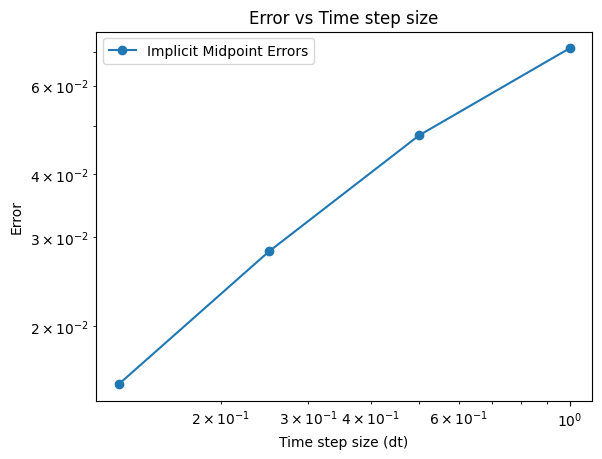

Estimated order of the implicit midpoint method: 0.7395213722106306


In [74]:
import matplotlib.pyplot as plt

# Initial condition
u0 = u_soliton(x, 0)

# Time parameters
t0, t1 = 0.0, 10.0

# Check the order of the method
errors = []
dts = [1, 0.5, 0.25, 0.125]
rtol, atol = 1e-12, 1e-12
for dt in dts:
    timesteps = int((t1 - t0) / dt)
    t = jnp.linspace(t0, t1, timesteps + 1)
    u_implicit_midpoint = gauss_legendre_6(f, u0, dt, t, None, rtol, atol)[-1]
    u_exact = u_soliton(x, t1)
    error = jnp.linalg.norm(u_implicit_midpoint - u_exact, ord=jnp.inf)
    errors.append(error)
    
# Plot the errors
plt.loglog(dts, errors, marker='o', label='Implicit Midpoint Errors')
plt.xlabel('Time step size (dt)')
plt.ylabel('Error')
plt.title('Error vs Time step size')
plt.legend()
plt.show()

# Calculate the order of the method
order = jnp.log(errors[0] / errors[-1]) / jnp.log(dts[0] / dts[-1])
print("Estimated order of the implicit midpoint method:", order)

In [76]:
u = jnp.zeros((64*4, 64*4))

u[::4, ::4].shape

(64, 64)

In [114]:
z = jnp.arange(253)+1

z[::4]

Array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153,
       157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205,
       209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253],      dtype=int64)

In [112]:
x = jnp.linspace(0, 1, 253)
t = jnp.linspace(0, 3, 379)
print(t[:253][::4])
print(len(t[:253][::4]))
print(x[-1])
print(x[::4][-1])
print(len(x[::4]))

[0.         0.03174603 0.06349206 0.0952381  0.12698413 0.15873016
 0.19047619 0.22222222 0.25396825 0.28571429 0.31746032 0.34920635
 0.38095238 0.41269841 0.44444444 0.47619048 0.50793651 0.53968254
 0.57142857 0.6031746  0.63492063 0.66666667 0.6984127  0.73015873
 0.76190476 0.79365079 0.82539683 0.85714286 0.88888889 0.92063492
 0.95238095 0.98412698 1.01587302 1.04761905 1.07936508 1.11111111
 1.14285714 1.17460317 1.20634921 1.23809524 1.26984127 1.3015873
 1.33333333 1.36507937 1.3968254  1.42857143 1.46031746 1.49206349
 1.52380952 1.55555556 1.58730159 1.61904762 1.65079365 1.68253968
 1.71428571 1.74603175 1.77777778 1.80952381 1.84126984 1.87301587
 1.9047619  1.93650794 1.96825397 2.        ]
64
1.0
1.0
64
